In [33]:
import pandas as pd
import lyricsgenius as lg
from pprint import pprint

In [1]:
LG_TOKEN = "-JkwFzsm9krxAzNgJo2aKEzHw2RsHaJzcWElzwQHIa-xU9invgqXARxn182I5UQd"

In [7]:
genius = lg.Genius(LG_TOKEN, remove_section_headers=True, skip_non_songs=True)

In [8]:
artist = genius.search_artist("Taylor Swift")

Searching for songs by Taylor Swift...

Song 1: "​cardigan"
Song 2: "​exile"
Song 3: "Lover"
Song 4: "​the 1"
Song 5: "Look What You Made Me Do"
Song 6: "​august"
Song 7: "​betty"
Song 8: "End Game"
Song 9: "You Need To Calm Down"
Song 10: "ME!"
Song 11: "Blank Space"
Song 12: "...Ready for It?"
Song 13: "​champagne problems"
Song 14: "​my tears ricochet"
Song 15: "​willow"
Song 16: "​invisible string"
Song 17: "Cruel Summer"
Song 18: "​the last great american dynasty"
Song 19: "Delicate"
Song 20: "Call It What You Want"
Song 21: "​seven"
Song 22: "Style"
Song 23: "​illicit affairs"
Song 24: "Bad Blood (Remix)"
Song 25: "​this is me trying"
Song 26: "Love Story"
Song 27: "​evermore"
Song 28: "Gorgeous"
Song 29: "​happiness"
Song 30: "​peace"
Song 31: "​mirrorball"
Song 32: "​mad woman"
Song 33: "​tolerate it"
Song 34: "The Man"
Song 35: "Don’t Blame Me"
Song 36: "I Did Something Bad"
Song 37: "Dress"
Song 38: "​ivy"
Song 39: "​no body, no crime"
Song 40: "​gold rush"
Song 41: "​hoax"
S

In [49]:
albums = genius.artist_albums(artist.id, page=1)

In [70]:
albums = []
page = 1
while page:
    res = genius.artist_albums(artist.id, page=page)
    albums.extend(res['albums'])
    page = res['next_page']

Deluxe for all of them
Taylor Swift
Speak now
Fearless
Red
1989
Reputation
Lover
folklore
evermore

In [84]:
album_idx = {6, 10, 21, 25, 27, 28, 30, 36, 49}

In [86]:
selected_albums = [a for (idx, a) in enumerate(albums) if idx in album_idx]

In [90]:
for a in selected_albums:
    pprint(a['name'])
    pprint(a['id'])

'Fearless (Taylor’s Version)'
734107
'evermore (deluxe version)'
710147
'folklore (deluxe version)'
659926
'Lover'
520929
'reputation'
350247
'1989 (Deluxe)'
621286
'Red (Deluxe Edition)'
597875
'Speak Now (Deluxe)'
597883
'Taylor Swift (Deluxe)'
660089


In [93]:
deluxe_1989_id = 621286

In [97]:
a1989 = genius.album_tracks(deluxe_1989_id)

In [128]:
selected_albums[0]

{'_type': 'album',
 'api_path': '/albums/734107',
 'cover_art_thumbnail_url': 'https://images.genius.com/cb3e5556ace37f591ee4247fb36ba50b.300x300x1.jpg',
 'cover_art_url': 'https://images.genius.com/cb3e5556ace37f591ee4247fb36ba50b.1000x1000x1.jpg',
 'full_title': "Fearless (Taylor's Version) by Taylor Swift",
 'id': 734107,
 'name': 'Fearless (Taylor’s Version)',
 'name_with_artist': "Fearless (Taylor's Version) (artist: Taylor Swift)",
 'release_date_components': {'year': 2021, 'month': 4, 'day': 9},
 'url': 'https://genius.com/albums/Taylor-swift/Fearless-taylor-s-version',
 'artist': {'_type': 'artist',
  'api_path': '/artists/1177',
  'header_image_url': 'https://images.genius.com/382ebc39e763a6d7b5fa7a2312d14905.1000x333x1.jpg',
  'id': 1177,
  'image_url': 'https://images.genius.com/3c1f124fcbbc2857a95e513fb34cc5a8.400x400x1.jpg',
  'index_character': 't',
  'is_meme_verified': True,
  'is_verified': True,
  'name': 'Taylor Swift',
  'slug': 'Taylor-swift',
  'url': 'https://gen

In [129]:
selected_album_names = [a['name'] for a in selected_albums]

In [133]:
artist.name

'Taylor Swift'

In [162]:
import re
lyrics = genius.search_song('clean', artist.name).lyrics

a = re.sub("\d*EmbedShare URLCopyEmbedCopy", "", lyrics)
a = re.sub("\n", " ", a)
a = re.sub("\(", "", a)
a = re.sub("\)", "", a)
a

Searching for "clean" by Taylor Swift...
Done.


"The drought was the very worst Oh-oh, oh-oh When the flowers that we'd grown together died of thirst It was months and months of back and forth Oh-oh, oh-oh You're still all over me Like a wine-stained dress I can't wear anymore  Hung my head as I lost the war And the sky turned black like a perfect storm  Rain came pouring down When I was drowning, that's when I could finally breathe And by morning Gone was any trace of you, I think I am finally clean Oh, oh, oh, oh  There was nothing left to do Oh-oh, oh-oh When the butterflies turned to Dust that covered my whole room So I punched a hole in the roof Oh-oh, oh-oh Let the flood carry away all my pictures of you  The water filled my lungs, I screamed so loud But no one heard a thing Rain came pouring down When I was drowning, that's when I could finally breathe And by morning Gone was any trace of you, I think I am finally clean Oh, oh, oh, oh I think I am finally clean Oh, oh Oh, oh, oh, oh, oh-oh Said, I think I am finally clean Oh,

In [177]:
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(25, 15))
    plt.imshow(wordcloud)
    plt.axis("off")

In [182]:
a1989 = genius.search_album("1989", artist.name)

Searching for "1989" by Taylor Swift...


In [ ]:
def get_album_lyrics(album_name):
    lyrics = genius.search_album(album_name, artist.name)
    

In [ ]:
def create_wordcloud(text):
    
    wordcloud = WordCloud(colormap='Pastel1', 
                      scale=3.6,
                      stopwords=STOPWORDS).generate(a)

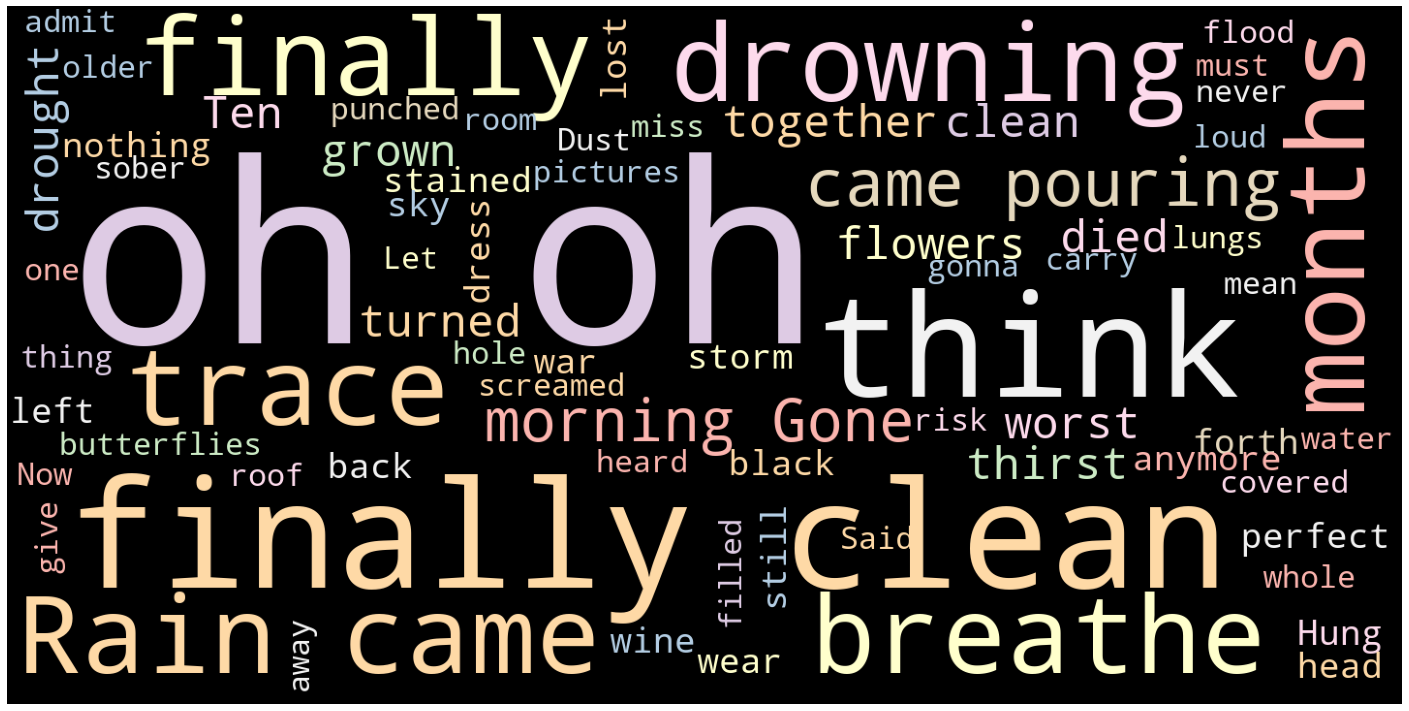

In [179]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(colormap='Pastel1', 
                      scale=3.6,
                      stopwords=STOPWORDS).generate(a)
plot_cloud(wordcloud)

In [112]:
clean_id = 551081

In [126]:
clean_song = genius.song(clean_id)

In [125]:
clean_song.to_json()

AttributeError: 'dict' object has no attribute 'to_json'